In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('/Users/hankiho/Downloads/Loan payments data.csv')

In [3]:
'''Loan_ID	대출한 고객의 고유한 ID
loan_status	이번 분석의 타겟 변수, 상환 여부를 나타냄
Principal	고객이 대출받은 금액
terms	대출금 지급까지 걸린 기간
effective_date	실제 계약 효과가 발휘하기 시작한 날짜
due_date	대출금 납부 기한 날짜
paid_off_time	고객이 은행에 모두 상환한 날짜, 시간
past_due_days	고객이 은행에 대출금을 모두 상환하는데 걸린 기간
age	고객의 나이
education	고객의 교육 수준
Gender	고객의 성별'''

'Loan_ID\t대출한 고객의 고유한 ID\nloan_status\t이번 분석의 타겟 변수, 상환 여부를 나타냄\nPrincipal\t고객이 대출받은 금액\nterms\t대출금 지급까지 걸린 기간\neffective_date\t실제 계약 효과가 발휘하기 시작한 날짜\ndue_date\t대출금 납부 기한 날짜\npaid_off_time\t고객이 은행에 모두 상환한 날짜, 시간\npast_due_days\t고객이 은행에 대출금을 모두 상환하는데 걸린 기간\nage\t고객의 나이\neducation\t고객의 교육 수준\nGender\t고객의 성별'

In [4]:
df.shape

(500, 11)

In [5]:
for i in df.columns:
    print(i + " : " + str(len(df[i].value_counts())))  

Loan_ID : 500
loan_status : 3
Principal : 6
terms : 3
effective_date : 7
due_date : 25
paid_off_time : 320
past_due_days : 33
age : 33
education : 4
Gender : 2


In [6]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

/Users/hankiho/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


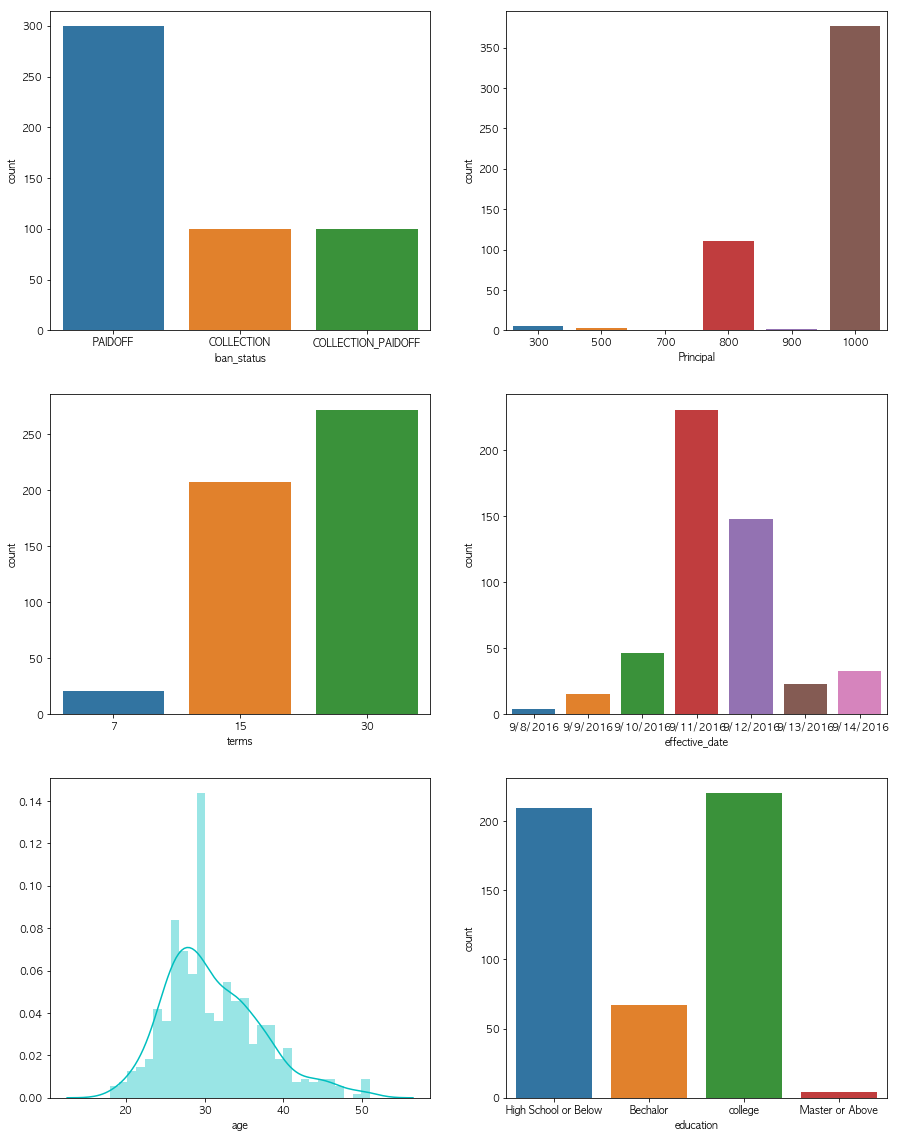

In [7]:
fig, ax = plt.subplots(3,2,figsize = (15,20))

sns.countplot(x = 'loan_status', data = df, ax = ax[0,0])
sns.countplot(x = 'Principal', data = df, ax = ax[0,1])
sns.countplot(x = 'terms', data = df, ax = ax[1,0])
sns.countplot(x = 'effective_date', data = df, ax = ax[1,1])
sns.distplot(df["age"], bins = 30, color = 'c', ax = ax[2,0])
sns.countplot(x = 'education', data = df, ax = ax[2,1])

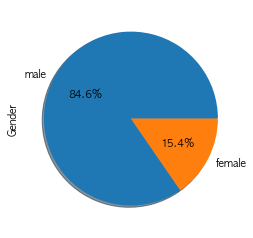

In [8]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True)

In [9]:
df['Yes / No'] = int (0)
for i in range (len(df['loan_status'])):
    if df['loan_status'].values[i] == 'PAIDOFF':
        df['Yes / No'].values[i] = 1
    else:
        df['Yes / No'].values[i] = 0

In [20]:
print (df['age'].describe())
print ('-------------------')
df['Ages'] = ''

for i in range(len(df)):
    if df['age'].values[i] < 20:
        df['Ages'].values[i] = '20대미만'
    elif df['age'].values[i] >= 20 and df['age'].values[i] < 30:
        df['Ages'].values[i] = '20대'
    elif df['age'].values[i] >= 30 and df['age'].values[i] < 40:
        df['Ages'].values[i] = '30대'
    elif df['age'].values[i] >= 40 and df['age'].values[i] < 50:
        df['Ages'].values[i] = '40대'
    else:
        df['Ages'].values[i] = '50대이상'

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64
-------------------


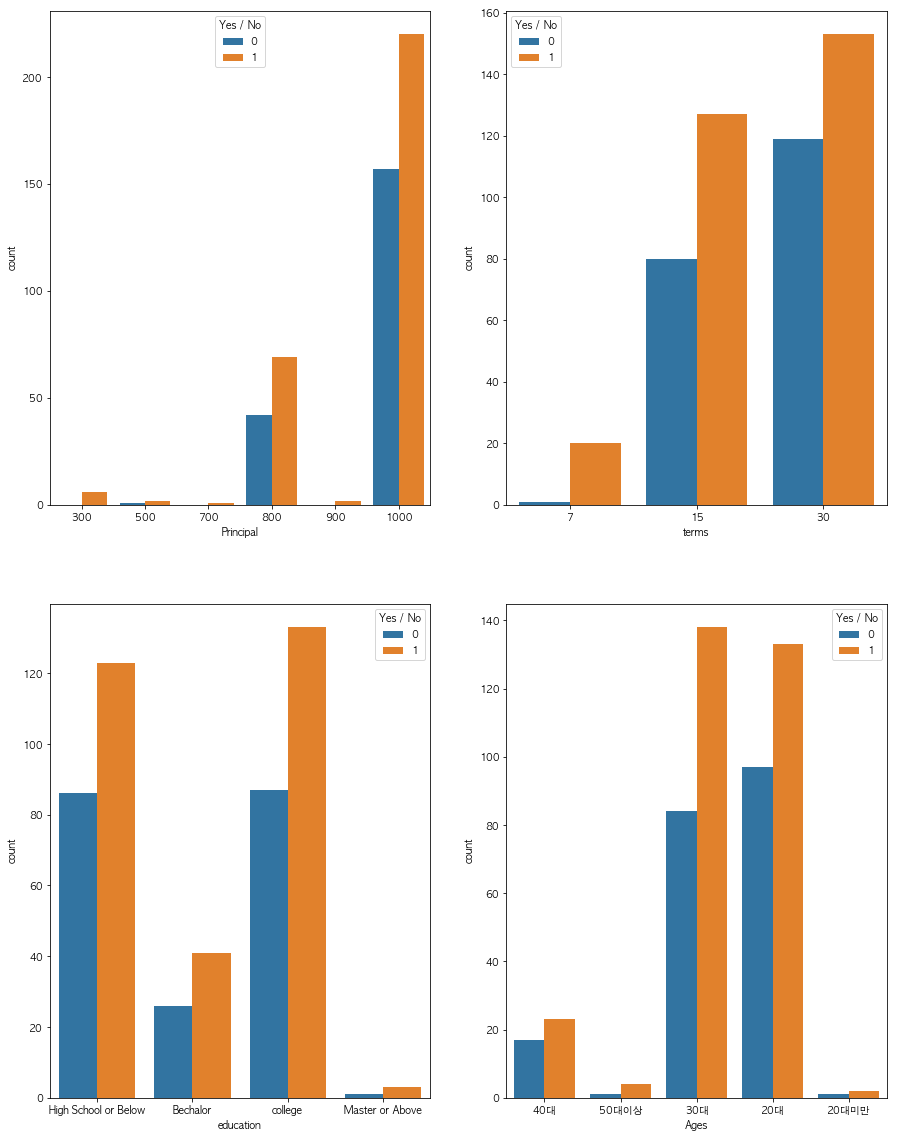

In [21]:
fig, ax = plt.subplots(2,2,figsize = (15,20))

sns.countplot(x = 'Principal', data = df, hue = 'Yes / No', ax = ax[0,0])
sns.countplot(x = 'terms', data = df, hue = 'Yes / No', ax = ax[0,1])
sns.countplot(x = 'education', data = df, hue = 'Yes / No', ax = ax[1,0])
sns.countplot(x = 'Ages', data = df, hue = 'Yes / No', ax = ax[1,1])

In [23]:
df['Sex_binominal'] = int(0)

for i in range(len(df)):
    if df['Gender'].values[i] == 'female':
        df['Sex_binominal'].values[i] = 0
    elif df['Gender'].values[i] == 'male':
        df['Sex_binominal'].values[i] = 1

In [26]:
df['Academical'] = int(0)

for i in range(len(df)):
    if df['education'].values[i] == 'High School or Below':
        df['Academical'].values[i] = 0
    else:
        df['Academical'].values[i] = 1

In [29]:
df_train = df[['Yes / No','terms','age','Sex_binominal','Academical']]

In [30]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Yes / No         500 non-null int64
terms            500 non-null int64
age              500 non-null int64
Sex_binominal    500 non-null int64
Academical       500 non-null int64
dtypes: int64(5)
memory usage: 19.6 KB


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['terms','age','Sex_binominal','Academical']], #독립 변수 데이터
                                                    df_train[['Yes / No']], #종속변수 데이터
                                                    test_size = 0.3, #나누는 사이즈 비율
                                                    random_state = 7) #난수 시드
X = df_train[df_train.columns[1:]]
Y = df_train['Yes / No']

In [39]:
#Decision Tree
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 66.0
----------------------------
Test Accuracy is  59.333333333333336


In [40]:
#Radial Support Vector Machines(rbf-SVM)
rbf_SVM = svm.SVC(kernel = 'rbf',C = 7,gamma = 0.1)
rbf_SVM.fit(X_train, y_train)
print('Score: {}'.format(rbf_SVM.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = rbf_SVM.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 68.57142857142857
----------------------------
Test Accuracy is  54.666666666666664


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#LogisticRegression
Logistic = LogisticRegression(C = 0.1)
Logistic.fit(X_train, y_train)
print('Score: {}'.format(Logistic.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = Logistic.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 62.857142857142854
----------------------------
Test Accuracy is  56.00000000000001


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
